In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/SDT data_Puru and Yash'

In [ ]:
import os
filenames =[]
import pandas as pd

In [ ]:
mainHead = None

In [ ]:
import random
for root, dirs, files in os.walk(path):
    try:
      name = root + '/' + files[0]
      if files[0] == "Readme.txt": continue
      df = pd.read_csv(name, sep=" ")

      df = df.dropna(axis=1)

      mainHead = pd.DataFrame(df)
      mainHead.columns = ['A', 'B', 'C', 'S No.','F1','F2','Response','T']
      mainHead.to_csv(f'{root.split("/")[-1]}.csv')
    except:
      print(root, dirs)
      pass
    

/content/drive/MyDrive/SDT data_Puru and Yash/Mallareddy 5s []
/content/drive/MyDrive/SDT data_Puru and Yash/Mallareddy 8s []
/content/drive/MyDrive/SDT data_Puru and Yash/Ajay 5s []


In [ ]:
import pandas as pd
import seaborn as sns

mainHead=pd.read_csv('/content/Mallareddy 0.5s.csv')

In [ ]:
x=mainHead['F1']
x

0      1.82888
1      1.88928
2      1.53243
3      1.94055
4      1.05786
        ...   
494    1.85946
495    1.28956
496    1.90558
497    1.39412
498    1.01346
Name: F1, Length: 499, dtype: float64

In [ ]:
y=mainHead['F2']
y

0      1.08649
1      1.81701
2      1.38505
3      1.07730
4      1.08261
        ...   
494    1.58144
495    1.87317
496    1.86236
497    1.16993
498    1.70751
Name: F2, Length: 499, dtype: float64

In [ ]:
z=mainHead['Response']

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
z

0      1
1      1
2      2
3      1
4      2
      ..
494    1
495    2
496    1
497    1
498    2
Name: Response, Length: 499, dtype: int64

[]

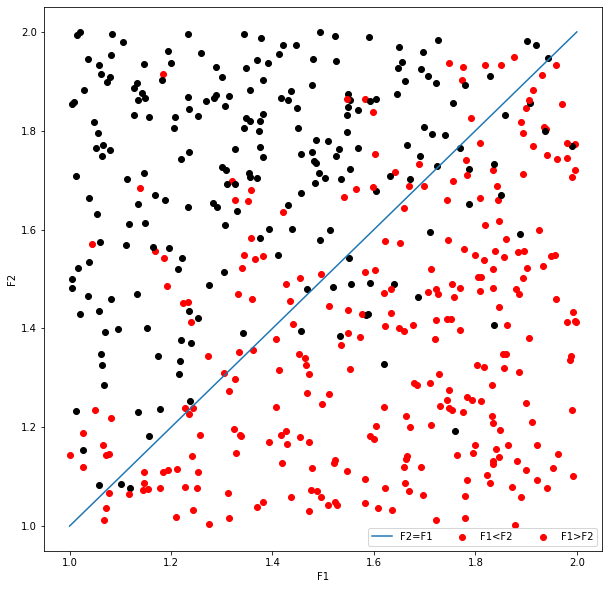

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
for i in range(len(z)):
  ax.scatter(x[i],y[i],color = 'red' if z[i]==1 else 'black')
ax.plot([1,2], [1, 2])

plt.legend(["F2=F1" , "F1<F2","F1>F2"],ncol = 3 , loc = "lower right")
plt.xlabel('F1')
plt.ylabel('F2')
plt.plot()

In [ ]:
train_x=pd.DataFrame(mainHead,columns=['F1','F2'])
train_y=mainHead['Response']


In [ ]:
slope=0
inverseslope = 0
for i in range(len(z)):

  if z[i] == 1:
    t = (y[i]-1)/(x[i]-1)
    if t > slope:
      print(t)
      print('-----------------')
      slope = t
      op =i
  else :
    t = (x[i]-1)/(y[i]-1)
    if t > inverseslope:
      inverseslope = t
      op2 = i





0.10434562300936197
-----------------
0.9187320079165167
-----------------
1.082642646756627
-----------------
1.2073870682019487
-----------------
4.974220916952195
-----------------
121.56302521008155
-----------------


[]

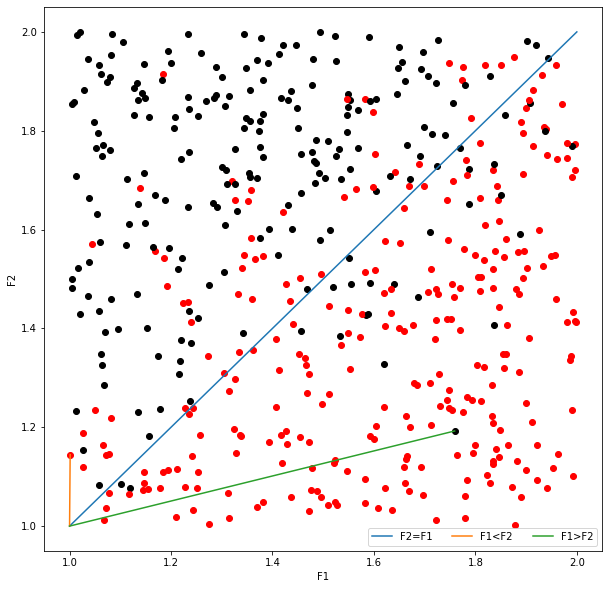

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
for i in range(len(z)):
  ax.scatter(x[i],y[i],color = 'red' if z[i]==1 else 'black')
ax.plot([1,2], [1, 2])
ax.plot([1,x[op]],[1,y[op]])
ax.plot([1,x[op2]],[1,y[op2]])

plt.legend(["F2=F1" , "F1<F2","F1>F2"],ncol = 3 , loc = "lower right")
plt.xlabel('F1')
plt.ylabel('F2')
plt.plot()

In [ ]:
# plt.figure(figsize=(10, 8))
# # Plotting our two-features-space
# sns.scatterplot(x=np.array(X_train)[:, 0], 
#                 y=np.array(X_train)[:, 1], 
#                 hue=y_train, 
#                 s=8);
# # Constructing a hyperplane using a formula.
# w = svc.coef_[0]           # w consists of 2 elements
# b = svc.intercept_[0]      # b consists of 1 element
# x_points = np.linspace(1, 2)    # generating x-points from -1 to 1
# y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# # Plotting a red hyperplane
# plt.plot(x_points, y_points, c='r');
# # Encircle support vectors
# plt.scatter(svc.support_vectors_[:, 0],
#             svc.support_vectors_[:, 1], 
#             s=50, 
#             facecolors='none', 
#             edgecolors='gray', 
#             alpha=.5);
# # Step 2 (unit-vector):
# w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
# # Step 3 (margin):
# margin = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
# # Step 4 (calculate points of the margin lines):
# decision_boundary_points = np.array(list(zip(x_points, y_points)))
# points_of_line_above = decision_boundary_points + w_hat * margin
# points_of_line_below = decision_boundary_points - w_hat * margin
# # Plot margin lines
# # Blue margin line above
# plt.plot(points_of_line_above[:, 0], 
#          points_of_line_above[:, 1], 
#          'b--', 
#          linewidth=2)
# # Green margin line below
# plt.plot(points_of_line_below[:, 0], 
#          points_of_line_below[:, 1], 
#          'g--',
#          linewidth=2)

In [ ]:
from sklearn import svm

[]

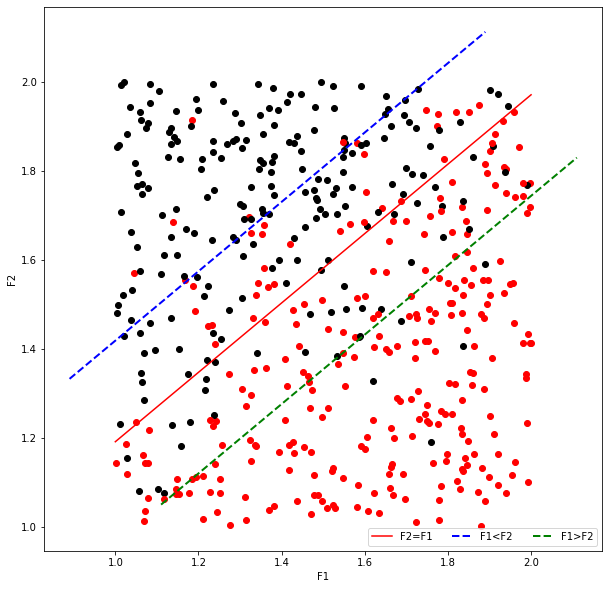

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
for i in range(len(z)):
  ax.scatter(x[i],y[i],color = 'red' if z[i]==1 else 'black')
# ax.plot([1,2], [1, 2])

#svm hyper
X = np.array(train_x)  
y = train_y

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

w = svc.coef_[0]           # w consists of 2 elements
b = svc.intercept_[0]      # b consists of 1 element
x_points = np.linspace(1, 2)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

# Step 2 (unit-vector):
w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

#
plt.legend(["F2=F1" , "F1<F2","F1>F2"],ncol = 3 , loc = "lower right")
plt.xlabel('F1')
plt.ylabel('F2')
plt.plot()

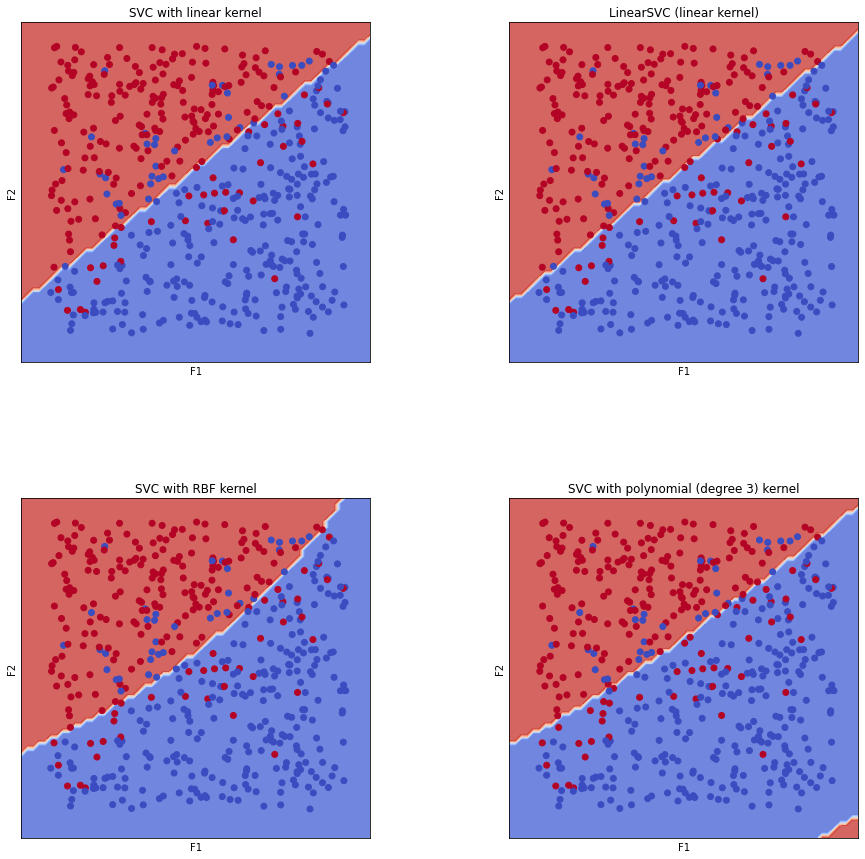

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = np.array(train_x)  
y = train_y

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-0.1 , X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


plt.figure(figsize=(15, 15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=svc.predict(X_test)
accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.81

In [ ]:
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

In [ ]:
for i,clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
  y_pred=clf.predict(X_test)
  accuracy_score(y_test, y_pred)
  print(accuracy_score(y_test, y_pred))


0.82
0.82
0.8
0.81
